# Component 1 — Water quality analysis

### Importing Libraries

In [ ]:
import keras
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from collections import Counter
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.svm import LinearSVC
from keras.models import Sequential
from tensorflow.keras import layers
from imblearn.base import BaseSampler
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import schedules
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler 

## Data Preprocessing

#### Data Cleaning

In [40]:
df = pd.read_csv("Phytoplankton.csv")
df.head()

,Phytoplankton Monitoring Programme results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessot...,Prorocentrum cordatum \ncells L-1\n(Venerupin)
1,Jan-21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND
2,Feb-21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND
3,Mar-21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND
4,Apr-21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND


### Reshaping the data

In [41]:
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header
df = df[:828]

In [42]:
df.head()

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin)
1,Jan-21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND
2,Feb-21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND
3,Mar-21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND
4,Apr-21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND
5,May-21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,06/01/2021,ND,ND,ND,ND,ND,ND,ND


In [43]:
df.isnull().sum()

0
Sample number                                           0
Production area                                         1
Bed ID                                                  1
Local authority                                         0
Grid reference\n\nNote 1                                1
Sampling point                                          0
Date sample collected                                   0
Alexandrium spp. \ncells L-1\n(PSP)                     0
Dinophysiaceae \ncells L-1\n(DSP)                       1
Prorocentrum lima \ncells L-1\n(DSP)                    1
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                1
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)        1
Protoceratium reticulatum \ncells L-1\n(Yessotoxin)     0
Prorocentrum cordatum \ncells L-1\n(Venerupin)          0
dtype: int64

In [44]:
df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].replace("ND", 0)
df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace("ND", 0)
df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].replace("ND", 0)
df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].replace("ND", 0)

### Inspecting all unique values from targeted columns

In [45]:
df["Alexandrium spp. \ncells L-1\n(PSP)"].unique()

array([0, 'Unable to analyse, too much sediment', '200', '40', '100',
       '120', '80', '320', '400', '500', 'NOT TESTED, SUBMITTED IN ERROR',
       '160', '240'], dtype=object)

In [46]:
df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].unique()

array([0, '400', 'Unable to analyse, too much sediment', '200', '800',
       '600', '80', '1000', '160', '320', '560', '3600', '1160', '2400',
       '2700', '12720', '1400', '240', '640', '880', '960', '3200',
       '1080', '840', '3800', '2360', '4600', '8760', '3480', '120',
       '1920', '1760', '280', '1960', '5600', '4280', '3960', '8100',
       '10300', '3000', '1480', '720', '2080', '8600', '185500', '60900',
       '1800', '6280', '2900', '1900', '2000', '1840', '2280', '7080',
       '13080', '17400', '13720', '11300', '8300', '2100', '360', '1200',
       '4800', '1120', '66400', '152900', '71400', '13520', '42120',
       '38520', '1640', '1300', '6440', '3280', '13680', '252000',
       '18400', '1600', '8000', '1360', '5800', '760', '7560', '27800',
       '289400', '68760', '15280', '23000', '34600', '60000', '43000',
       '6640', '8800', '16600', '17120', '6320', '48400', '1100',
       '162000', '24600', '4200', '8920', '16320', '1680', '520', '220',
       '2840

In [47]:
df["Dinophysiaceae \ncells L-1\n(DSP)"].unique()

array([0, 'Unable to analyse, too much sediment', '40', '80', '160',
       '520', '240', '320', '200', '280', '400', '120', '800', '1360',
       '720', '640', '680', nan, '1880', '100', '2960', '1400', '480',
       '1320', '1000', '760'], dtype=object)

In [48]:
df["Prorocentrum lima \ncells L-1\n(DSP)"].unique()

array([0, 'Unable to analyse, too much sediment', '100', '40', '200',
       '120', nan, '400', '18520', '17480'], dtype=object)

### Replacing all NaN values with -1

In [49]:
df.loc[(df["Alexandrium spp. \ncells L-1\n(PSP)"].isna())] = -1
df.loc[(df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].isna())] = -1
df.loc[(df["Dinophysiaceae \ncells L-1\n(DSP)"].isna())] = -1
df.loc[(df["Prorocentrum lima \ncells L-1\n(DSP)"].isna())] = -1

### Replacing unique strings in columns

In [50]:
df["Alexandrium spp. \ncells L-1\n(PSP)"].replace(['Unable to analyse, too much sediment', 'NOT TESTED, SUBMITTED IN ERROR'], 0, inplace=True)
df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace(['Unable to analyse, too much sediment'], 0, inplace=True)
df["Dinophysiaceae \ncells L-1\n(DSP)"].replace(['Unable to analyse, too much sediment'], 0, inplace=True)
df["Prorocentrum lima \ncells L-1\n(DSP)"].replace(['Unable to analyse, too much sediment'], 0, inplace=True)

In [51]:
df[["Sample number", "Alexandrium spp. \ncells L-1\n(PSP)", "Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", 
   "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)" ]].head()

,Sample number,Alexandrium spp. \ncells L-1\n(PSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP)
1,Jan-21,0,0,0,0
2,Feb-21,0,0,0,0
3,Mar-21,0,400,0,0
4,Apr-21,0,0,0,0
5,May-21,0,0,0,0


In [52]:
dataset = df[["Alexandrium spp. \ncells L-1\n(PSP)", "Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", 
   "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)" ]]


dataset = dataset.astype(int)


dataset.insert(loc=0, column='Sample number', value=df['Sample number'])

In [53]:
df['Sample number']

1      Jan-21
2      Feb-21
3      Mar-21
4      Apr-21
5      May-21
        ...  
824    853/21
825    854/21
826    855/21
827    856/21
828    857/21
Name: Sample number, Length: 828, dtype: object

#### Creating a threshold for the Phytoplanktons

In [55]:
thresholds = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, 
              "Dinophysiaceae \ncells L-1\n(DSP)" : 100, 
              "Prorocentrum lima \ncells L-1\n(DSP)" : 100, 
              "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000}

In [56]:
def check_thresholds(dataset):
    t = []
    for i,j in enumerate(dataset["Sample number"]):
        alexandrium = dataset.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"]
        pseudo_nitzschia = dataset.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]
        dinophysiaceae = dataset.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"]
        prorocentrum = dataset.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]
        
        threshold_reached = 0 #initialize threshold to zero
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:
            threshold_reached = 1
        elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]:
            threshold_reached = 1
        t.append(threshold_reached)
    return t 

#### Adding Threshold Column

In [57]:
thresholds_reached = check_thresholds(dataset)
dataset['thresholds_reached'] = thresholds_reached

In [58]:
print(len(dataset[dataset['thresholds_reached']==1]))
print(len(dataset[dataset['thresholds_reached']==0]))

95
733


#### Plot Before Oversampling

<AxesSubplot:xlabel='thresholds_reached', ylabel='Density'>

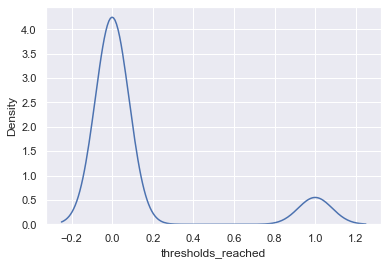

In [61]:
sns.kdeplot(data=dataset, x="thresholds_reached")

#### Saving the new data into csv in the working directory

In [63]:
pd.DataFrame.to_csv(dataset, 'thresholds_cleaned.csv', sep=',', index=False)

In [64]:
dataset

,Sample number,Alexandrium spp. \ncells L-1\n(PSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),thresholds_reached
1,Jan-21,0,0,0,0,0
2,Feb-21,0,0,0,0,0
3,Mar-21,0,400,0,0,0
4,Apr-21,0,0,0,0,0
5,May-21,0,0,0,0,0
...,...,...,...,...,...,...
824,853/21,0,7080,40,0,0
825,854/21,0,0,0,0,0
826,855/21,0,0,40,0,0
827,856/21,0,0,0,0,0


#### Splitting the data into numpy arrays x and y

In [65]:
X = dataset.iloc[0:829, 1:5]
y = dataset.iloc[:, -1] # threshold reached

In [66]:
X.shape

(828, 4)

In [67]:
X

,Alexandrium spp. \ncells L-1\n(PSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP)
1,0,0,0,0
2,0,0,0,0
3,0,400,0,0
4,0,0,0,0
5,0,0,0,0
...,...,...,...,...
824,0,7080,40,0
825,0,0,0,0
826,0,0,40,0
827,0,0,0,0


In [68]:
y # Threshold reached

1      0
2      0
3      0
4      0
5      0
      ..
824    0
825    0
826    0
827    0
828    0
Name: thresholds_reached, Length: 828, dtype: int64

#### Splitting the dataset into the Training set and Test set

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Oversampling and balancing

In [70]:
sm = SMOTE(random_state = 2) 
x_train, y_train = sm.fit_resample(X, y.ravel())

In [71]:
print('After OverSampling, the shape of train_X: {}'.format(x_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

After OverSampling, the shape of train_X: (1466, 4)
After OverSampling, the shape of train_y: (1466,) 



In [72]:
print("label '1' count after oversampling: {}".format(sum(y_train == 1))) 
print("label '0' count after oversampling: {}".format(sum(y_train == 0))) 

label '1' count after oversampling: 733
label '0' count after oversampling: 733


In [73]:
new_dataset = x_train
new_dataset['threshold_reached'] = y_train

In [74]:
print(len(new_dataset[new_dataset['threshold_reached']==1]))
print(len(new_dataset[new_dataset['threshold_reached']==0]))

733
733


<AxesSubplot:xlabel='threshold_reached', ylabel='Density'>

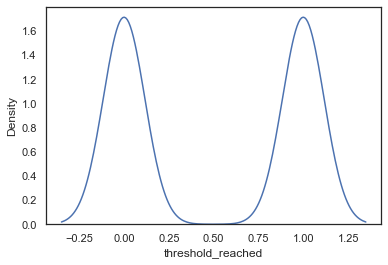

In [75]:
sns.kdeplot(data=new_dataset, x="threshold_reached")

In [76]:
del x_train['threshold_reached']

#### Feature Scaling

Use feature scaling to level the data

In [77]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [78]:
X_train

array([[-0.4013779 , -0.27433262, -0.41004003, -0.09733433],
       [-0.4013779 , -0.27433262, -0.41004003, -0.09733433],
       [-0.4013779 , -0.26805563, -0.41004003, -0.09733433],
       ...,
       [-0.4013779 , -0.27433262,  0.93654736, -0.09733433],
       [-0.4013779 , -0.27433262,  0.27875148, -0.09733433],
       [ 0.38792826,  2.57154539, -0.41004003, -0.09733433]])

In [79]:
X_test

array([[-0.4013779 , -0.17578385, -0.41004003, -0.09733433],
       [-0.4013779 , -0.27433262, -0.41004003, -0.09733433],
       [-0.4013779 , -0.27433262, -0.41004003, -0.09733433],
       [-0.4013779 , -0.27307722, -0.27228172, -0.09733433],
       [-0.4013779 , -0.27433262, -0.41004003, -0.09733433],
       [-0.4013779 , -0.26680023, -0.41004003, -0.09733433],
       [-0.4013779 , -0.26303403, -0.41004003, -0.09733433],
       [-0.4013779 , -0.27433262, -0.41004003, -0.09733433],
       [-0.4013779 , -0.23855377, -0.13452342, -0.09733433],
       [-0.4013779 , -0.27182182, -0.41004003, -0.09733433],
       [-0.4013779 , -0.27433262, -0.41004003, -0.09733433],
       [-0.4013779 , -0.27433262, -0.41004003, -0.09733433],
       [-0.4013779 , -0.27433262, -0.41004003, -0.09733433],
       [-0.4013779 , -0.27244952, -0.41004003, -0.09733433],
       [-0.4013779 , -0.27433262, -0.41004003, -0.09733433],
       [-0.4013779 ,  0.54481475, -0.41004003, -0.09733433],
       [-0.4013779 , -0.

### Kernel SVM

In [80]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [81]:
y_pred = classifier.predict(X_test)

In [82]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[148   0]
 [  1  17]]


0.9939759036144579

# Model Architecture 1

## Buiding the Artificial Neural Network

### Initializing the Neural Network

* Activation function: relu, sigmoid(Output layer)
* Units: 1000, 1
* Dropout: 0.2
* Epoch: 10
* Batch Size = 16
* Optimizer: Adam
* loss function: binary_crossentropy

In [84]:
model_1 = Sequential() 
model_1.add(Dense(units=1000, activation='relu', input_shape=(4,)))  #Adding the input layer
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation='sigmoid')) # Adding the output layer

model_1.summary()

model_1.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


### Training the Artificial Neural Network

In [85]:
batch_size = 32
epochs = 20

history = model_1.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(X_test, y_test))
score = model_1.evaluate(X_test, y_test, verbose=0) 

Epoch 1/20
46/46 [==============================] - 4s 12ms/step - loss: 0.4469 - accuracy: 0.8424 - val_loss: 0.2580 - val_accuracy: 0.9699
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 0.2257 - accuracy: 0.9420 - val_loss: 0.1551 - val_accuracy: 0.9940
Epoch 3/20
46/46 [==============================] - 0s 5ms/step - loss: 0.1470 - accuracy: 0.9673 - val_loss: 0.1112 - val_accuracy: 0.9940
Epoch 4/20
46/46 [==============================] - 0s 5ms/step - loss: 0.1146 - accuracy: 0.9741 - val_loss: 0.0883 - val_accuracy: 0.9940
Epoch 5/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0988 - accuracy: 0.9789 - val_loss: 0.0843 - val_accuracy: 0.9940
Epoch 6/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0884 - accuracy: 0.9809 - val_loss: 0.0697 - val_accuracy: 0.9940
Epoch 7/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0820 - accuracy: 0.9802 - val_loss: 0.0638 - val_accuracy: 0.9940
Epoch 8/20
46/46 [=

In [87]:
print("score")
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

score
Test loss: 0.02216632477939129
Test accuracy: 0.9939758777618408


### Visualizing the training result

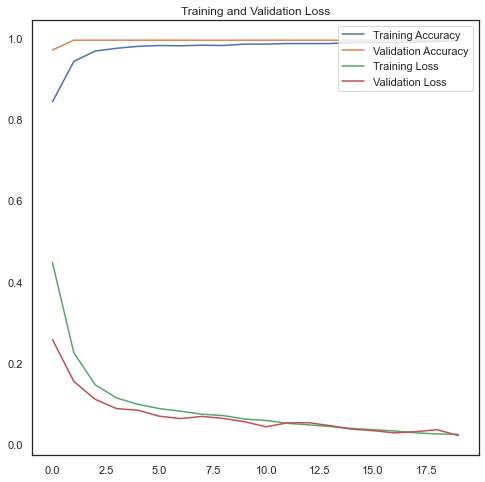

In [88]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 

# Model 2
Adjusting the parameters in Model 1
* Activation function: relu, relu, sigmoid
* Units: 500, 5, 1
* Dropout: 0.9,0.2
* Epoch: 15
* Batch Size 32
* Optimizer: Adam
* loss function: binary_crossentropy

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 500)               2500      
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 2505      
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 5,011
Trainable params: 5,011
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
46/46 [==============================] - 

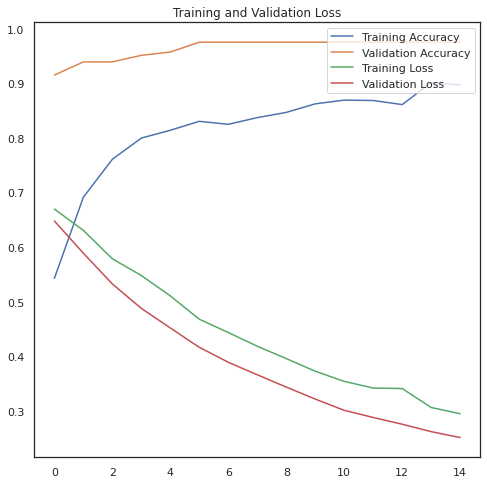

In [53]:
model_2 = Sequential() 
model_2.add(Dense(units=500, activation='relu', input_shape=(4,))) 
model_2.add(Dropout(0.9)) 
model_2.add(Dense(units=5, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

model_2.compile(loss='binary_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])




batch_size = 32
epochs =15

history = model_2.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(X_test, y_test))
score = model_2.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 

# Model Architecture 3

## Training, evaluating and visualizing the neural network
* Activation function: ReLu, tanh, sigmoid
* Units: 32, 5
* Dropout: 0.2,0.2
* Epoch: 20
* Batch_size 32
* Optimizer: Adam
* loss function: binary_crossentropy

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                160       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
46/46 [==============================] - 1s 8

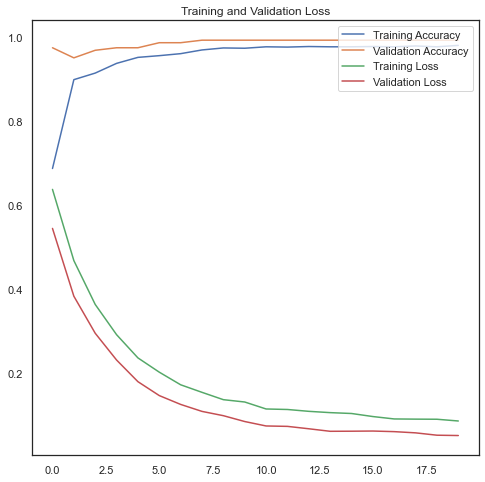

In [89]:
model_3 = Sequential() 
model_3.add(Dense(units=32, activation='relu', input_shape=(4,)))  # Adding the input layer
model_3.add(Dropout(0.2)) 
model_3.add(Dense(units=5, activation='tanh'))  #Adding the second hidden layer
model_3.add(Dropout(0.2))
model_3.add(Dense(1, activation='sigmoid')) # Adding the outer layer

model_3.summary()

model_3.compile(loss="binary_crossentropy", 
              optimizer="RMSprop", 
              metrics=['accuracy'])

batch_size = 32
epochs = 20

history = model_3.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(X_test, y_test))
score = model_3.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 

### Model Architecture 4 (Deeper Network)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1000)              5000      
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                32032     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
 dropout_5 (Dropout)         (None, 5)                 0         
                                                                 
 dense_8 (Dense)             (None, 5)                

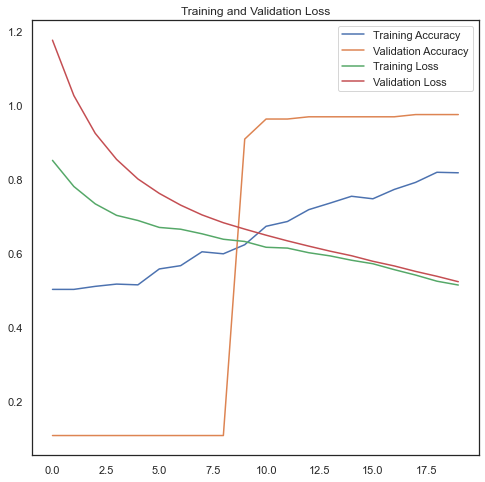

In [90]:
model_4 = Sequential() 
model_4.add(Dense(units=1000, activation='relu', input_shape=(4,)))  # Adding the input layer
model_4.add(Dropout(0.2)) 
model_4.add(Dense(units=32, activation='tanh'))  #Adding the second hidden layer
model_4.add(Dropout(0.2))
model_4.add(Dense(units=5, activation='tanh'))  #Adding the third hidden layer
model_4.add(Dropout(0.2))
model_4.add(Dense(units=5, activation='sigmoid'))  #Adding the forth layer
model_4.add(Dropout(0.2))
model_4.add(Dense(1, activation='sigmoid')) # Adding the outer layer



model_4.summary()

model_4.compile(loss="binary_crossentropy", 
              optimizer="SGD", 
              metrics=['accuracy'])

batch_size = 32
epochs = 20

history = model_4.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(X_test, y_test))
score = model_4.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 

In [ ]:
X_test.shape

(166, 4)

## Making  a Prediction

### Generating an array of zeros in the shape of x_test

In [55]:
predictions = np.zeros((X_test.shape))
predictions

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [56]:
y_test = y_test.to_numpy()

In [57]:
type(y_test)

numpy.ndarray

### Test Data Performance

In [58]:
pred = model_1.predict(predictions)
pred #Prediction is 99%

array([[0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],
       [0.9999835],


### Making a Single Prediction

In [93]:
print(model_1.evaluate(sc.transform([[0, 400, 0, 0]]))) # predicting line three of "dataset" with the classifier

1/1 [==============================] - 0s 118ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]


## Data visualisation 

In [60]:
new_dataset['threshold_reached'] = y_train

In [61]:
new_dataset

,Alexandrium spp. \ncells L-1\n(PSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),threshold_reached
0,0,0,0,0,0
1,0,0,0,0,0
2,0,400,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1461,0,51,222,0,1
1462,21,400,145,0,1
1463,0,0,391,0,1
1464,0,0,200,0,1


0                                          Alexandrium spp. \ncells L-1\n(PSP)  ...  threshold_reached
0                                                                               ...                   
Alexandrium spp. \ncells L-1\n(PSP)                                   1.000000  ...           0.399763
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                             -0.019807  ...           0.226473
Dinophysiaceae \ncells L-1\n(DSP)                                    -0.034920  ...           0.396349
Prorocentrum lima \ncells L-1\n(DSP)                                 -0.038398  ...           0.096990
threshold_reached                                                     0.399763  ...           1.000000

[5 rows x 5 columns]


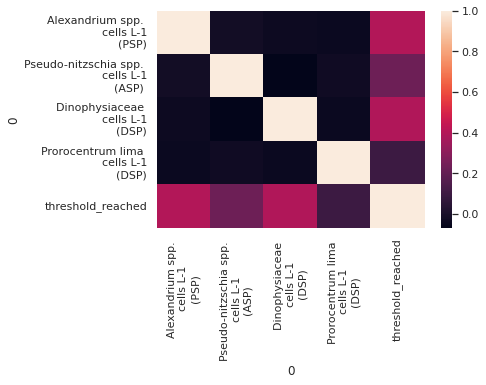

In [62]:
corrMatrix = new_dataset.corr()
print (corrMatrix) 
ax = sns.heatmap(corrMatrix)

## Increasing Data Size

### Data Cleaning
Adding three other attributes from the source dataset.

In [95]:
df["Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)"].unique()

array(['ND', 'Unable to analyse, too much sediment', nan, '720', '300',
       '40', -1], dtype=object)

In [96]:
df["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "].unique()

array(['ND', 'Unable to analyse, too much sediment', '40', -1, '120'],
      dtype=object)

In [97]:
df["Prorocentrum cordatum \ncells L-1\n(Venerupin) "].unique()

array(['ND', 'Unable to analyse, too much sediment', '40', '200', '100',
       '80', '280', '160', '240', '300', '1000', '280000', '1200',
       '1574000', -1, '4160', '760', '400', '120'], dtype=object)

In [98]:
df["Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)"].replace(['Unable to analyse, too much sediment', 'ND'], 0, inplace=True)
df["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "].replace(['Unable to analyse, too much sediment', 'ND'], 0, inplace=True)
df["Prorocentrum cordatum \ncells L-1\n(Venerupin) "].replace(['Unable to analyse, too much sediment', 'ND'], 0, inplace=True)

In [99]:
df.loc[(df["Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)"].isna())] = -1 #replacing nan with -1
df["Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)"] = df["Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)"].astype(int)
df["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "] = df["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "].astype(int)
df["Prorocentrum cordatum \ncells L-1\n(Venerupin) "] = df["Prorocentrum cordatum \ncells L-1\n(Venerupin) "].astype(int)

## Setting the New Threshold

In [100]:
i_dataset = df[["Alexandrium spp. \ncells L-1\n(PSP)", "Dinophysiaceae \ncells L-1\n(DSP)", 
                "Prorocentrum lima \ncells L-1\n(DSP)", "Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", 
                'Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)',
                "Protoceratium reticulatum \ncells L-1\n(Yessotoxin) ", 
                "Prorocentrum cordatum \ncells L-1\n(Venerupin) " ]]


i_dataset = i_dataset.astype(int)


i_dataset.insert(loc=0, column='Sample number', value=df['Sample number']) #insert Sample number at the first column[0]

In [101]:
thresholds_2 = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, "Dinophysiaceae \ncells L-1\n(DSP)" : 100, 
                "Prorocentrum lima \ncells L-1\n(DSP)" : 100, "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000, 
                'Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)': 100,
                "Protoceratium reticulatum \ncells L-1\n(Yessotoxin) " : 40, 
                "Prorocentrum cordatum \ncells L-1\n(Venerupin) " : 150000 }

In [102]:
i_dataset

,Sample number,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin)
1,Jan-21,0,0,0,0,0,0,0
2,Feb-21,0,0,0,0,0,0,0
3,Mar-21,0,0,0,400,0,0,0
4,Apr-21,0,0,0,0,0,0,0
5,May-21,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
824,853/21,0,40,0,7080,0,0,0
825,854/21,0,0,0,0,0,0,0
826,855/21,0,40,0,0,0,0,0
827,856/21,0,0,0,0,0,0,0


In [103]:
def check_thresholds_2(i_dataset):
    t = []
    for i,j in enumerate(i_dataset["Sample number"]):
        alexandrium = i_dataset.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"]
        pseudo_nitzschia = i_dataset.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]
        dinophysiaceae = i_dataset.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"]
        prorocentrum = i_dataset.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]
        Ligulodinium_polyedrum = i_dataset.iloc[i]['Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)']
        Protoceratium_reticulatum = i_dataset.iloc[i]["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "]
        Prorocentrum_cordatum = i_dataset.iloc[i]["Prorocentrum cordatum \ncells L-1\n(Venerupin) "]
        
        threshold_reached_2 = 0
        if pseudo_nitzschia >= thresholds_2["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:
            threshold_reached_2 = 1
        elif dinophysiaceae >= thresholds_2["Dinophysiaceae \ncells L-1\n(DSP)"]:
            threshold_reached_2 = 1
        elif prorocentrum >= thresholds_2["Prorocentrum lima \ncells L-1\n(DSP)"]:
            threshold_reached_2 = 1
        elif alexandrium >= thresholds_2["Alexandrium spp. \ncells L-1\n(PSP)"]:
            threshold_reached_2 = 1
        elif Ligulodinium_polyedrum >= thresholds_2['Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)']:
            threshold_reached_2 = 1
        elif Protoceratium_reticulatum >= thresholds_2["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "]:
            threshold_reached_2 = 1
        elif Prorocentrum_cordatum >= thresholds_2["Prorocentrum cordatum \ncells L-1\n(Venerupin) "]:
            threshold_reached_2 = 1
        t.append(threshold_reached_2)
    return t 

In [104]:
thresholds_reached_2 = check_thresholds_2(i_dataset)
i_dataset['thresholds_reached_2'] = thresholds_reached_2

In [105]:
pd.DataFrame.to_csv(df, 'thresholds_cleaned_2.csv', sep=',', index=False)

In [106]:
i_dataset

,Sample number,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),thresholds_reached_2
1,Jan-21,0,0,0,0,0,0,0,0
2,Feb-21,0,0,0,0,0,0,0,0
3,Mar-21,0,0,0,400,0,0,0,0
4,Apr-21,0,0,0,0,0,0,0,0
5,May-21,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
824,853/21,0,40,0,7080,0,0,0,0
825,854/21,0,0,0,0,0,0,0,0
826,855/21,0,40,0,0,0,0,0,0
827,856/21,0,0,0,0,0,0,0,0


In [107]:
print(len(i_dataset[i_dataset['thresholds_reached_2']==1]))
print(len(i_dataset[i_dataset['thresholds_reached_2']==0]))

102
726


BarPlot Before Oversampling

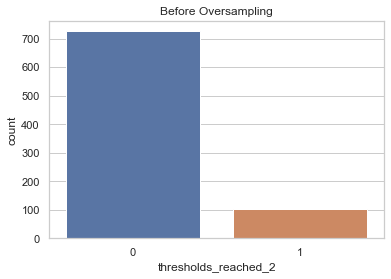

In [108]:
sns.set_theme(style="whitegrid")
plt.title('Before Oversampling')
sns.countplot(data = i_dataset, x= "thresholds_reached_2")
plt.show()

In [109]:
xx = i_dataset.iloc[0:829, 1:7]
yy = i_dataset.iloc[:, -1]

In [110]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.20, random_state=42)

Oversampling and balancing

In [111]:
sm = SMOTE(random_state = 2) 
xx_train, yy_train = sm.fit_resample(xx, yy.ravel())

In [112]:
print('After OverSampling, the shape of train_X: {}'.format(xx_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(yy_train.shape)) 

After OverSampling, the shape of train_X: (1452, 6)
After OverSampling, the shape of train_y: (1452,) 



In [113]:
print("label '1' count after oversampling: {}".format(sum(yy_train == 1))) 
print("label '0' count after oversampling: {}".format(sum(yy_train == 0))) 

label '1' count after oversampling: 726
label '0' count after oversampling: 726


In [114]:
new_i_dataset = xx_train
new_i_dataset['threshold_reached_2'] = yy_train

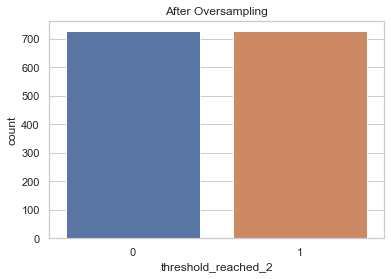

In [115]:
sns.set_theme(style="whitegrid")
plt.title('After Oversampling')
sns.countplot(data = new_i_dataset, x= "threshold_reached_2")
plt.show()

### Feature Scaling

In [116]:
del xx_train['threshold_reached_2'] # removed temporarily to adjust input shape for scaling

In [117]:
sc = StandardScaler()
XX_train = sc.fit_transform(xx_train)
XX_test = sc.transform(xx_test)

### Kernel SVM

In [118]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(XX_train, yy_train)

SVC(random_state=0)

In [119]:
yy_pred = classifier.predict(XX_test)
yy_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(yy_test, yy_pred)
print(cm)
accuracy_score(yy_test, yy_pred)

[[147   0]
 [  1  18]]


0.9939759036144579

In [123]:
model_5 = Sequential() 
model_5.add(Dense(units=1000, activation='relu', input_shape=(6,)))  #Adding the input layer
model_5.add(Dropout(0.2))
model_5.add(Dense(1, activation='sigmoid')) # Adding the output layer

model_5.summary()

model_5.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

batch_size = 32
epochs = 20

history = model_5.fit(XX_train, yy_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(XX_test, yy_test))
score = model_5.evaluate(XX_test, yy_test, verbose=0)

print("score")
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1000)              7000      
                                                                 
 dropout_10 (Dropout)        (None, 1000)              0         
                                                                 
 dense_17 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
46/46 [==============================] - 1s 7ms/step - loss: 0.4406 - accuracy: 0.8822 - val_loss: 0.2525 - val_accuracy: 0.9699
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 0.2397 - accuracy: 0.9401 - val_loss: 0.1474 - val_accuracy: 0.9940
Epoch 3/20
46/46 [==================

HeatMap

In [114]:
new_i_dataset['threshold_reached_2'] = yy_train

0                                                   Alexandrium spp. \ncells L-1\n(PSP)  ...  threshold_reached_2
0                                                                                        ...                     
Alexandrium spp. \ncells L-1\n(PSP)                                            1.000000  ...             0.374220
Dinophysiaceae \ncells L-1\n(DSP)                                             -0.033217  ...             0.387012
Prorocentrum lima \ncells L-1\n(DSP)                                          -0.029339  ...             0.078898
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                                      -0.016116  ...             0.203380
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)                              -0.015490  ...             0.080321
Protoceratium reticulatum \ncells L-1\n(Yessoto...                            -0.011627  ...             0.102384
threshold_reached_2                                                            0.374220 

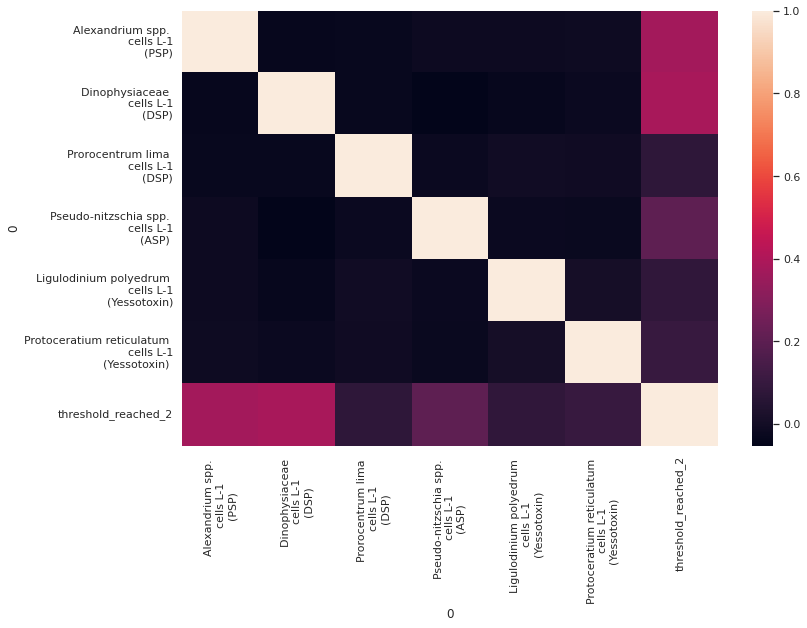

In [115]:
# Increased the size of the heatmap to avoid overlapping of labels
sns.set(rc = {'figure.figsize':(12,8)})
corrMatrix = new_i_dataset.corr()
print (corrMatrix) 
ax = sns.heatmap(corrMatrix)